<center><h1>1-c: SVM</h1></center>

<center><h2><a href="https://rdfia.github.io/">Course link</a></h2></center>

# Warning : 
# Do "File -> Save a copy in Drive" before you start modifying the notebook, otherwise your modifications will not be saved.


In [1]:
!wget https://github.com/rdfia/rdfia.github.io/raw/master/data/15_scenes_Xy.npz

--2022-11-17 09:43:51--  https://github.com/rdfia/rdfia.github.io/raw/master/data/15_scenes_Xy.npz
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rdfia/rdfia.github.io/master/data/15_scenes_Xy.npz [following]
--2022-11-17 09:43:51--  https://raw.githubusercontent.com/rdfia/rdfia.github.io/master/data/15_scenes_Xy.npz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35952210 (34M) [application/octet-stream]
Saving to: ‘15_scenes_Xy.npz’

15_scenes_Xy.npz    100%[===================>]  34.29M  --.-KB/s    in 0.09s   

2022-11-17 09:43:52 (399 MB/s) - ‘15_scenes_Xy.npz’ saved [35952210/35952210]



In [2]:
%pylab inline

import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score

Populating the interactive namespace from numpy and matplotlib


Loading BoW of the whole dataset (4485 images, thus 4485 dictionnary of 1001 words):

In [3]:
data = np.load("15_scenes_Xy.npz")
X = data["X"]
y = data["y"]

X.shape, y.shape

((4485, 1001), (4485,))

Let's see what is the class distribution:

In [4]:
{c: nb for c, nb in enumerate(np.bincount(y))}

{0: 241,
 1: 360,
 2: 328,
 3: 260,
 4: 308,
 5: 374,
 6: 410,
 7: 292,
 8: 356,
 9: 215,
 10: 216,
 11: 311,
 12: 210,
 13: 289,
 14: 315}

Split the dataset into a train & test set:

In [5]:
X.shape, y.shape

((4485, 1001), (4485,))

In [6]:
X_train_all, X_test, y_train_all, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

Then a validation set from the train set:

In [7]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train_all, y_train_all, test_size=0.25, random_state=42, stratify=y_train_all
)

Let's hyperparameter gridsearch over different values of `C`:

In [8]:
C_values = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]
accuracies = []

for c in C_values:
  print(f'Training SVM with C={c}')
  #TODO
  svc = SVC(C=c)

  # Fit on sub-train set
  # TODO
  svc.fit(X_train, y_train)

  # Evaluate on val set
  # TODO
  y_pred = svc.predict(X_val)
  acc = accuracy_score(y_val, y_pred)

  print(f'--> accuracy = {acc}')
  accuracies.append(acc)

Training SVM with C=1
--> accuracy = 0.5306577480490524
Training SVM with C=2
--> accuracy = 0.5919732441471572
Training SVM with C=4
--> accuracy = 0.6655518394648829
Training SVM with C=8
--> accuracy = 0.7023411371237458
Training SVM with C=16
--> accuracy = 0.7357859531772575
Training SVM with C=32
--> accuracy = 0.7547380156075808
Training SVM with C=64
--> accuracy = 0.7647714604236343
Training SVM with C=128
--> accuracy = 0.7513935340022296
Training SVM with C=256
--> accuracy = 0.7513935340022296
Training SVM with C=512
--> accuracy = 0.7513935340022296


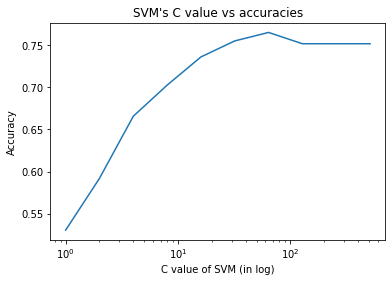

In [9]:
#TODO plot the relation between `c` and the accuracy
plt.plot(C_values, accuracies)
plt.title("SVM's C value vs accuracies")
plt.xlabel("C value of SVM (in log)")
plt.ylabel("Accuracy")
plt.xscale("log")

In [10]:
#TODO Fit on the whole train set, evaluate on the test set
best_c_svc = SVC(C=64)
best_c_svc.fit(X_train_all, y_train_all)

y_test_pred = best_c_svc.predict(X_test)
acc = accuracy_score(y_test_pred, y_test)

f"The accuracy is: {acc * 100: 0.2f}%"

'The accuracy is:  75.81%'

Do the same with different kernel values, and different decision functions:

In [11]:
# TODO
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import GridSearchCV
import pandas as pd

param_grid = {
    "C": [1, 2, 4, 8, 16, 32, 64, 128, 256, 512],
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "decision_function_shape": ["ovo", "ovr"]
}
sh = GridSearchCV(
    estimator=SVC(), param_grid=param_grid, scoring="accuracy", cv=5, n_jobs=-1, verbose=2
).fit(X_train, y_train)

sh.best_estimator_, sh.score(X_test, y_test)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


(SVC(C=128, decision_function_shape='ovo'), 0.7224080267558528)

In [12]:
sh.best_estimator_.get_params()

{'C': 128,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovo',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}